# NLP and the Web

## Task 0 ~ 0P

__Task 0 is only relevant for the homework.__

##### a) Please enter your group number

YOUR ANSWER HERE

_**Regarding types, documentation, and output:**_

_We tried to make the description of the parameters as clear as possible. However, if you believe that something is missing, please reach out to us in Moodle. We provide type hints for the function parameters and return values of the functions that you have to implement._

_Nevertheless, your code must use the provided method stubs and parameters. Furthermore, make sure that your code runs without errors and in a reasonable amount of time, for example by using "Kernel/Restart & Run All" before submitting._

_Please use comments where appropriate to help the tutors understand your code. This is especially important for the more extensive exercises later on. Finally, please pay attention to how you output the results. We highly recommend using `display(df)` for displaying data frames._

_**Please only modify the template in the specified markdown and code cells (e.g. YOUR CODE / ANSWER / IMPORTS HERE). Some cells are left blank on purpose. Please do not modify these cells, because they are used to autograde your submission. If these cells are modified, the automatic grading for your submission will fail and we might deduct points. Please do not modify the cells containing public and private tests. If you want to do your own tests, please use the code cell containing your code solution (YOUR CODE HERE).**_

---

# Home Exercise 2

<h2> Part 1: Hidden Markov Models (10 Points) </h2>

In this exercise, you will be able to perform part-of-speech tagging by yourself using Hidden Markov Models.
Part-of-speech tagging (POS tagging) is the process assigning a syntactic label to each token in a document. This
kind of tagging gives us more information about surrounding words, e.g. adjectives occur more often before a noun and
after a determiner and verbs appear usually after a noun. As an example, here we have two sentences:<br><br>
"Time flies like an arrow."<br>
"Fruit flies ate a banana"

A tokenizer would split them into the following tokens:

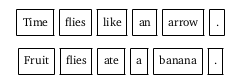

A part-of-speech tagger (spaCy tagger) could then assign labels, or <b>tags</b>, to the tokens according to their respective parts
of speech:

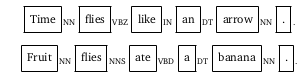

Hidden Markov Models (HMMs): are graphical probabilistic models that enable us to talk about observed and hidden
events. The latter being considered as causal factors in the model (Jurafky & Martin, 2019). For instance, in our real
world we can see words but we cannot see pos-tags. Given the explanation of HMMs in the lecture and in our lab session,
we will find the best pos sequence for a given word sequence using the Bayes’ Rule and the Viterbi Algorithm, please
refer to slides from both Lecture and Lab session for further details.<br><br>
<b>Note:</b> For this exercise, you may only use spaCy, scikit-learn, NumPy, Pandas and internal packages from Python. Please
follow the instructions as given below and in case of questions use our Discussion forum in Moodle, we don’t answer
questions via email.
<br>
<br>
Using the files <i>transisition_probabilities.csv</i> and <i>observation_likelihoods.csv</i>, compute the likelihood of POS tags for the
following word sequence:

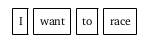

<i>Please use comments where appropriate to help tutors understand your code.</i>

<h3>Task 1 - 4 points</h3>

Load the given files and:

In [1]:
import pandas as pd
import numpy as np

# Load CSV files
observation_likelihood = pd.read_csv('observation_likelihoods.csv')
transition_probability = pd.read_csv('transisition_probabilities.csv')

# Assign labels for better readability
observation_likelihood.columns = ['Tags', ' I', ' want', ' to ', ' race']
transition_probability.columns = ['Tags', 'VB', 'TO', 'NN', 'PPSS']

transition_probability

,Tags,VB,TO,NN,PPSS
0,<s>,0.0190,0.00430,0.04100,0.06700
1,VB,0.0038,0.03500,0.04700,0.00700
2,TO,0.8300,0.00000,0.00047,0.00000
3,NN,0.0040,0.01600,0.08700,0.00450
4,PPSS,0.2300,0.00079,0.00120,0.00014


a) Write a function to obtain a list of all possible tag sequences for the word sequence given above and store them in a list. Print the first 5 tag sequences as well as the total number of sequences. 

In [31]:
from typing import List, Tuple
import itertools

def calculate_tag_permutations(observations: pd.DataFrame) -> List[Tuple[str, ...]]:
    """
    Calculates an array-like object of all possible tag permutations for the token sequence
    
    Input:
      observations: pandas DataFrame object of tokens and tag probabilities
   
    Output:    
      A list of all tag permutations, each permutation is contained in a tuple
    """
    perm = []
    # YOUR CODE HERE
    #raise NotImplementedError()
  
    perm = list(itertools.combinations_with_replacement(observations["Tags"], len(observations["Tags"])))


    return perm

sequences = calculate_tag_permutations(observation_likelihood)
print(sequences)

[('VB', 'VB', 'VB', 'VB'), ('VB', 'VB', 'VB', 'TO'), ('VB', 'VB', 'VB', 'NN'), ('VB', 'VB', 'VB', 'PPSS'), ('VB', 'VB', 'TO', 'TO'), ('VB', 'VB', 'TO', 'NN'), ('VB', 'VB', 'TO', 'PPSS'), ('VB', 'VB', 'NN', 'NN'), ('VB', 'VB', 'NN', 'PPSS'), ('VB', 'VB', 'PPSS', 'PPSS'), ('VB', 'TO', 'TO', 'TO'), ('VB', 'TO', 'TO', 'NN'), ('VB', 'TO', 'TO', 'PPSS'), ('VB', 'TO', 'NN', 'NN'), ('VB', 'TO', 'NN', 'PPSS'), ('VB', 'TO', 'PPSS', 'PPSS'), ('VB', 'NN', 'NN', 'NN'), ('VB', 'NN', 'NN', 'PPSS'), ('VB', 'NN', 'PPSS', 'PPSS'), ('VB', 'PPSS', 'PPSS', 'PPSS'), ('TO', 'TO', 'TO', 'TO'), ('TO', 'TO', 'TO', 'NN'), ('TO', 'TO', 'TO', 'PPSS'), ('TO', 'TO', 'NN', 'NN'), ('TO', 'TO', 'NN', 'PPSS'), ('TO', 'TO', 'PPSS', 'PPSS'), ('TO', 'NN', 'NN', 'NN'), ('TO', 'NN', 'NN', 'PPSS'), ('TO', 'NN', 'PPSS', 'PPSS'), ('TO', 'PPSS', 'PPSS', 'PPSS'), ('NN', 'NN', 'NN', 'NN'), ('NN', 'NN', 'NN', 'PPSS'), ('NN', 'NN', 'PPSS', 'PPSS'), ('NN', 'PPSS', 'PPSS', 'PPSS'), ('PPSS', 'PPSS', 'PPSS', 'PPSS')]


In [32]:
# Test
assert sequences[0] == ('VB', 'VB', 'VB', 'VB')
assert sequences[3] == ('VB', 'VB', 'VB', 'PPSS')


In [4]:
# Test
import random
idx = random.randint(0, len(sequences)-1)
while True:
  idx2 = random.randint(0, len(sequences)-1)
  if idx2 != idx:
    break
assert sequences[idx] != sequences[idx2]


In [33]:
# Test
idx = random.randint(0, len(sequences)-1)
assert len(sequences[idx]) == 4


In [ ]:
# Test
allowed_tags = ['VB', 'TO', 'NN', 'PPSS']
idx = random.randint(0, len(sequences)-1)
for tag in list(sequences[idx]):
  assert tag in allowed_tags


b) Implement the Hidden Markov Model (HMM) discussed in the lecture and use it to assign a probability to each possible sequence. Print the most likely tag sequence and its probability 

In [ ]:
import operator

def calculate_sequence_probability(sequence: List[str], 
                                   observations: pd.DataFrame, transitions: pd.DataFrame) -> float:
    """
    Calculates a probability for a token sequence using the Hidden Markov Model
    
    Input:
      sequences: List of POS tag sequences
      observations: pandas DataFrame object of observation probabilities
      transitions: pandas DataFrame object of transition probabilities
    
    Output:
      Probability of the POS sequence
    """
    sequence_probability = 1

    #YOUR CODE HERE
    raise NotImplementedError()
    return sequence_probability

In [ ]:
# Test


In [ ]:
def score_tag_sequences(sequences: List[List[str]], 
                        observations: pd.DataFrame, 
                        transitions: pd.DataFrame) -> List[Tuple[Tuple[str, ...], float]]:
    """
    Calculate the sequences probability for every entry in an array-like object of POS sequences
    
    Input:
      sequences: List of POS tag sequences
      observations: pandas DataFrame object of observation probabilities
      transitions: pandas DataFrame object of transition probabilities
    
    Output:
      A list that contains a POS sequence and a probability for every entry
    """
    tag_scores = []
    for sequence in sequences:
        tag_scores.append(calculate_sequence_probability(sequence, observations, transitions))
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    return tag_scores

In [ ]:
# Test


In [36]:
def find_sequence_with_highest_probability(
    scored_sequences: List[Tuple[Tuple[str, ...], float]]) -> Tuple[Tuple[str, ...], float]:
    """
    Returns the POS tag sequence and probability with the highest probability from an array-like object that contains a POS sequence and a probability for every entry
    
    Input:
      scored_sequences: A list that contains a POS sequence and a probability for every entry
    
    Output:
      Tuple of sequence and probability 
    """
    best_comb = ()
    best_score = 0
    # YOUR CODE HERE
    for sequence in scored_sequences:
        new_score = sequence[1]
        if new_score > best_score:
            best_score = new_score
            best_comb = sequence
            

    #raise NotImplementedError()
    return best_comb

scored_sequences = score_tag_sequences(sequences, observation_likelihood, transition_probability)
best_combination = find_sequence_with_highest_probability(scored_sequences)


NameError: name 'score_tag_sequences' is not defined

In [ ]:
# Test

assert best_combination[0] == ('PPSS', 'VB', 'TO', 'VB')
assert np.isclose([best_combination[1]], [1.829995e-10])[0]

c) Why would the naive solution of scoring each tag sequence not scale up to real world problems ? How does the Viterbi algorithm relate to that ? Discuss in up to 3 sentences

YOUR ANSWER HERE

<h3>Task 2 - 6 points</h3>

Implement the Viterbi algorithm as shown in slide 92ff. of our lecture slides `Text Classification 2` and apply it to the data from Task 1.1:

a) Compute the initialization step of Viterbi given transition and observation probability and print the probability matrix

In [ ]:
import math
import numpy as np

def viterbi_init(observation_likelihood:pd.DataFrame, transition_probability:pd.DataFrame) -> np.ndarray:
    """
    Initialize the viterbi matrix
    
    Input:
      observation_likelihood: pandas DataFrame object - observation probabilities
      transition_probability: pandas DataFrame object - transition probabilities
    
    Output:
      numpy ndarray object - the initialized viterbi matrix
    """
    viterbi = np.zeros((1, 1)) # not the right shape
    # YOUR CODE HERE
    raise NotImplementedError()
    return viterbi
    

In [ ]:
# Test
expected_init = np.array( [[0.     , 0.     , 0.     , 0.     ],
                           [0.     , 0.     , 0.     , 0.     ],
                           [0.     , 0.     , 0.     , 0.     ],
                           [0.02479, 0.     , 0.     , 0.     ]])
viterbi = viterbi_init(observation_likelihood, transition_probability)
assert viterbi.shape == (4,4)
assert (viterbi == expected_init).all()


b) Compute the recursion step of Viterbi given transition and observation probability and print the probability matrix again

In [ ]:
def viterbi_recursion(observation_likelihood:pd.DataFrame, 
                      transition_probability:pd.DataFrame) -> Tuple[np.ndarray, np.ndarray, int]:
    """
    Compute the recursion steps of viterbi algorithm
    
    Input:
      observation_likelihood: pandas DataFrame object of observation probabilities
      transition_probability: pandas DataFrame object of transition probabilities
    
    Output:
      1: numpy ndarray object - the viterbi matrix
      2: numpy ndarray object - the backpointer matrix which contains the previous state
      3: integer - the index of the most likely starting state
    """
    viterbi = np.zeros((1, 1)) # not the right shape
    backpointer = np.zeros((1, 1)) # not the right shape
    max_idx = 0
    # YOUR CODE HERE
    raise NotImplementedError()
    return viterbi, backpointer, max_idx
    

In [ ]:
# Test

expected_v = np.array([[0.00000000e+00, 5.30258100e-05, 0.00000000e+00, 1.82999494e-10],
                       [0.00000000e+00, 0.00000000e+00, 1.83734432e-06, 0.00000000e+00],
                       [0.00000000e+00, 1.60639200e-09, 0.00000000e+00, 4.92224542e-13],
                       [2.47900000e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

expected_b = np.array([[0., 3., 0., 1.],
                       [0., 0., 0., 0.],
                       [0., 3., 0., 1.],
                       [0., 0., 0., 0.]])

v,b,m = viterbi_recursion(observation_likelihood, transition_probability)

assert np.isclose(v, expected_v).all()
assert (b==expected_b).all()
assert m==0


c) Compute the termination step of Viterbi given transition and observation probability and print the most likely tag sequence and its probability

In [ ]:
def viterbi_final(observation_likelihood:pd.DataFrame, transition_probability:pd.DataFrame) -> Tuple[List[str], float]:
    """
    Find the most likely POS combination with the help of viterbi algorithm
    
    Input:
      observation_likelihood: pandas DataFrame object of observation probabilities
      transition_probability: pandas DataFrame object of transition probabilities
    
    Input:
      1: list of string - the most probable POS combination
      2: float - the probability of that combination
    """
    tag_sequence = []
    p_best_path = 0
    # YOUR CODE HERE
    raise NotImplementedError()
    return tag_sequence, p_best_path

In [ ]:
# Test
tag_sequence, p = viterbi_final(observation_likelihood, transition_probability)
assert tag_sequence == ['PPSS', 'VB', 'TO', 'VB']
assert np.isclose([p], [1.8299949392340004e-10])[0]


<h2>Part 2: Vectorizing and ML with scikit-learn (10 Points) </h2>

Text classification is the task of categorizing text data into a set of predefined labels. The most important part of text classification is feature engineering: the process of extracting features from raw text data for machine learning models. We discussed previously what is a bag of words (bow) and why it is important to use it. In today’s class, we have seen how to transform a raw text into a set of features that can be represented as a matrix or a vector. In this exercise, we will practice feature engineering for text classification with <a href="https://scikit-learn.org/stable/">scikit-learn</a>. The goal of this exercise is to explore different features and their representations, to train and to evaluate different classifiers to automatically identify the sentiment polarity of the movie reviews.<br><br>
<b>Data:</b> The dataset provided for this exercise contains 5k movie reviews with positive and negative labels, which were taken from the IMDB Dataset. It's saved in the file *IMDB_reviews.csv*, which has two columns separated by `,`. The first column contains reviews and the second column contains their sentiment labels (0=negative, 1=positive). <br><br>
<b>Note:</b> For this exercise, you may **only use** spaCy, scikit-learn, NumPy, Pandas and internal packages from Python. Please follow the instructions as given below and in case of questions use our Discussion forum in Moodle.<br><br>
Please use comments where appropriate to help tutors understand your code. 

<h3> Task 3 - 5 Points </h3>

**a)** Read the data from *IMDB_reviews.csv*. Shuffle and split it into training (60%), development (20%) and test (20%) sets. Print the size of the training, development and test set. **(1.5p)**

*Hint: Like in the class exercise, you can use train_test_split from scikit-learn for this.*  

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

def split_data(data:pd.DataFrame, seed:int=42) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    Split the data into train/dev/set with the said percentage. You can use the default seed but can 
    also try other seed if you want. Try to get the model's accuracy to the recommended accuracy that 
    is used in the tests.
    
    Input:
      data: pandas DataFrame object - the loaded data
      seed: int - the pseudo-random seed 
    
    Output:
      1: pandas DataFrame object - train data
      2: pandas DataFrame object - development data
      3: pandas DataFrame object - test data
    """
    df_train, df_test, df_dev = None, None, None
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    split_train = int(len(data) * 0.6)
    split_test = int(len(data) * 0.8)

    data.sample()
    df_train = data.iloc[:split_train]
    df_test = data.iloc[split_train:split_test]
    df_dev = data.iloc[split_test:]
    
    return df_train, df_dev, df_test


In [40]:
# Test

data = pd.read_csv("IMDB_reviews.csv")
df_train, df_dev, df_test = split_data(data)
assert len(df_train) == 3000


**b)** Implement the function `train_valid_cls()`. The function should take the training and development set as well as a vectorizer and a classifier as input parameters (as shown below). The function should then train and validate the given classifier using the data and the vectorizer and print the accuracy on the development dataset. Also return the classifier and the accuracy.
<br>
Use `train_valid_cls()` together with the `CountVectorizer()` and the `MultinomialNB()` provided by scikit-learn, to train and to evaluate two multinomial Naive Bayes classifiers with the training and development datasets. One classifier uses the count matrix (absolute occurrence of each word) and the other one uses the binary count matrix (binary, whether a word occurs in a text) as features. Print the accuracy of each classifier. Also return the classifier and the accuracy. **(2.5p)**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
  

def train_valid_cls(train_texts: pd.Series, train_labels: pd.Series, dev_texts: pd.Series, dev_labels: pd.Series, 
                    vectorizer: CountVectorizer, classifier: MultinomialNB) -> Tuple[MultinomialNB, float]:
    """
    Train and validate the classifier with the given data and vectorizer, PRINT the accuracy of 
    the trained classifier on the development set.
    
    Input:
      train_texts: array-like object containing review texts from the training set
      train_labels: array-like object with corresponding sentiment labels for train_texts
      dev_texts: array-like object containing review texts from the development set
      dev_labels: array-like object with corresponding sentiment labels for dev_texts
      vectorizer: a customized scikit-learn Vectorizer 
      classifier: a scikit-learn Classifier
    
    Output:
      A classifier and the accuracy on dev set 
    """
    dev_acc = 0
    # YOUR CODE HERE
    raise NotImplementedError()
    return classifier, dev_acc
    

In [ ]:
# naive bayes classifier with count matrix

def count_matrix_NBC() -> Tuple[MultinomialNB, float]:
    """
    Initialize and train the naive bayes classifier with count matrix
    
    Output:
      A classifier and the accuracy on dev set 
    """
    cls = None
    acc = 0
    # YOUR CODE HERE
    raise NotImplementedError()
    return cls, acc

In [ ]:
# Test
cls, acc = count_matrix_NBC()
assert acc > 0
assert cls is not None

In [ ]:
# Test
cls, acc = count_matrix_NBC()
assert acc >= 0.7
assert isinstance(cls, MultinomialNB)

In [ ]:
# naive bayes classifier with binary count matrix

def binary_count_matrix_NBC() -> Tuple[MultinomialNB, float]:
    """
    Initialize and train the naive bayes classifier with binary count matrix
    
    Output:
      A classifier and the accuracy on dev set 
    """
    cls = None
    acc = 0
    # YOUR CODE HERE
    raise NotImplementedError()
    return cls, acc

In [ ]:
# Test
cls, acc = binary_count_matrix_NBC()
assert acc > 0
assert cls is not None

In [ ]:
# Test
cls, acc = binary_count_matrix_NBC()
assert acc >= 0.7
assert isinstance(cls, MultinomialNB)

**c)** Using the function `train_valid_cls()` from b), explore at least 3 different ranges of n-grams (introduce bigram, trigram ... features) and try to find the best one for training the multinomial Naive Bayes classifier with count matrix or binary count matrix. Report the accuracy on the development set for every range you tried and also return the classifier and the accuracy. **(1p)**

In [ ]:
def ngram_classifier(n: int, df_train: pd.DataFrame, df_dev: pd.DataFrame) -> Tuple[MultinomialNB, float]:
    """
    Initialize and train the naive bayes classifier with n-grams
    
    Output:
      A classifier and the accuracy on dev set 
    """
    
    print(f"ngram_range=(1, {n})")
    cls = None
    acc = 0
    train_data = df_train['text']
    train_label = df_train['label']
    dev_data = df_dev['text']
    dev_label = df_dev['label']
    # YOUR CODE HERE
    raise NotImplementedError()
    return cls, acc

n_grams_list = [] # Put your 3 n-grams in here
models_list = [ngram_classifier(n, df_train, df_dev) for n in n_grams_list]

In [ ]:
# Test
cls, acc = ngram_classifier(3, df_train, df_dev)
assert acc >= 0.7
assert isinstance(cls, MultinomialNB)

<h3> Task 4 - 5 Points </h3>

**a)** Use spaCy's medium language model to tokenize every review text in the training and development sets (It may take a few minutes). You should store the tokens as spaCy token objects (instead of strings) for the subsequent tasks **(0.5p)**

In [ ]:
import spacy
# In case you have not downloaded it yet you can use the following line
# spacy.cli.download("en_core_web_md")

In [ ]:
from spacy.tokens.token import Token

nlp = spacy.load('en_core_web_md')

def tokenize(text:str) -> List[Token]:
    """
    tokenize the sentence with spacy
    
    Input:
      text: str - the sentence
    
    Output:
      A list of tokens from the tokenized sentence
    """
    
    tokens = []
    # YOUR CODE HERE
    raise NotImplementedError()
    return tokens

df_train['tokenized'] = df_train['text'].apply(tokenize)
df_dev['tokenized'] = df_dev['text'].apply(tokenize)


In [ ]:
# Test
assert isinstance(df_train['tokenized'].iloc[0][0], Token)


**b)** For each review text, calculate the average of all word vectors as its vector representation. Then train a gaussian Naive Bayes classifier (`sklearn.naive_bayes.GaussianNB`) with the obtained vector representations, evaluate and print its accuracy on the development set. Also return the classifier and the accuracy. **(1.5p)**

In [ ]:
import numpy as np

# Feature extraction

def feature_extract(tokenized_text: list[Token, ...]) -> np.ndarray:
    """
    Compute the average vector of all token. Hint: you can use token.vector to get the vector
    of the given token.
    
    Output:
      numpy ndarray object - the computed mean vector
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Test
assert len(feature_extract(df_train['tokenized'].iloc[0]))==300


In [ ]:
def get_data(df_train: pd.DataFrame, df_dev: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
    """
    Compute the features of the train/dev dataset using feature_extract function
    
    Input:
      df_train: pandas DataFrame object - train data
      df_dev: pandas DataFrame object - development data
    
    Output:
      numpy ndarray - features of train dataset and dev dataset 
    """
    train_X = []
    dev_X = []
    # YOUR CODE HERE
    raise NotImplementedError()
    return np.array(train_X), np.array(dev_X)


In [ ]:
# Test
train, dev = get_data(df_train, df_dev)
assert train.shape == (3000, 300)
assert dev.shape == (1000, 300)

In [ ]:
# Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

def GNB_classifier(train_X: np.ndarray, dev_X: np.ndarray) -> Tuple[GaussianNB, float]:
    """
    Initialize and train the gaussian naive bayes classifier with the calculated features
    
    Input:
      train_X: numpy ndarray object - train data
      dev_X: numpy ndarray object - development data
    
    Output:
      A classifier and the accuracy on dev set 
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Test
cls, acc = GNB_classifier(train, dev)
assert isinstance(cls, GaussianNB)
assert acc > 0.6

**c)** Now, filter out all tokens except verbs, adjectives and adverbs from the tokenized review texts from a). You should store the remaining tokens as spaCy token objects (instead of strings). These remaining tokens should be verbs, adjectives and adverbs. 
Extract the spaCy word vectors of the remaining tokens and create a vector representation of each review text like you did in b). Then you should again train and evaluate a GaussianNB classifier and print its accuracy on the development set. Also return the classifier and the accuracy. **(2p)**

In [ ]:
# Filter tokens

def filter_tokens(tokenized_text: List[Token]) -> List[Token]:
    """
    Filter tokens that are not verbs, adjectives ore adverbs
    
    Input:
      tokenized_text: list of token object
    
    Output:
      List of filtered token object 
    """
    tokens = []
    # YOUR CODE HERE
    raise NotImplementedError()
    return tokens
    

In [ ]:
# Test
for t in filter_tokens(df_train['tokenized'].iloc[0]):
    assert t.pos_ in ['ADJ', 'ADV', 'VERB']
    

In [ ]:
# Create new word vectors
def get_filtered_data(df_train: pd.DataFrame, df_dev: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
    """
    Compute the features of the filtered train/dev dataset using feature_extract function
    
    Input:
      df_train: pandas DataFrame object - filtered train data
      df_dev: pandas DataFrame object - filtered development data
    
    Input:
      numpy ndarray - features of train dataset and dev dataset 
    """
    train_X = []
    dev_X = []
    # YOUR CODE HERE
    raise NotImplementedError()
    return np.array(train_X), np.array(dev_X)
    

In [ ]:
# Test
f_train, f_dev = get_filtered_data(df_train, df_dev)
assert f_train.shape == (3000, 300)
assert f_dev.shape == (1000, 300)


In [ ]:
# Gaussian Naive Bayes classifier

def GNB_classifier_filter(train_X: np.ndarray, dev_X: np.ndarray) -> Tuple[GaussianNB, float]:
    """
    Initialize and train the gaussian naive bayes classifier with the calculated features
    
    Input:
      train_X: numpy ndarray object - train data
      dev_X: numpy ndarray object - development data
      
    Output:
      A classifier and the accuracy on dev set 
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Test
cls, acc = GNB_classifier_filter(f_train, f_dev)
assert isinstance(cls, GaussianNB)
assert acc > 0.7

**d)** Choose your best model from Task 3 or Task 4 and test it on the test set, print the accuracy. Why is it important to evaluate your final model on a previously unused test set? Explain it in up to 2 sentences. <br><br>
<b>Note:</b> You should only test one model here, i.e. the best model from all models you trained in 3 and 4. If two models performed equally well choose one of them. **(1p)**

In [ ]:
# Use your best model and print its performance on the test set here

def print_best_model() -> None:
    """
    You don't need to use any parameter here. Just do whatever you like to print 
    the accuracy of your best model however you like.
    """
    # YOUR CODE HERE
    raise NotImplementedError()

YOUR ANSWER HERE

**Submission:**

Please upload your submission to Moodle before the next exercise session <font color="red">(Nov 29th, 23:59)</font>!

Submission format: `Group_XX_Exercise_XX.zip`

Your submission should contain your filled out Jupyter notebook (naming schema: `Group_XX_Exercise_XX.ipynb`) and any auxiliar files that are necessary to run your code (e.g., the datasets provided by us).

Each submission must be handed in only once per group.